[0.33917360442949658094, 0.81518504862519461184, 0.87653525394712568673, 0.88501478566562473925, 0.886699041867203294, 0.8871935006849980486, 0.88738473178002090513, 0.88747223548442718166, 0.8875165671728985657, 0.88754049454200329626, 0.887553939886502914, 0.8875616942948357037, 0.88756624295279962114, 0.8875689408704766979, 0.88757055272164886, 0.8875715202990869851, 0.88757210293752733515, 0.88757245449676584563, 0.88757266690836157636, 0.8875727953595737356, 0.8875728730822297963, 0.88757292012804069563, 0.88757294861212380506, 0.88757296586076480255, 0.887572976306881712, 0.8875729826337162794, 0.88757298646583791737, 0.88757298878700514254, 0.8875729901929987273, 0.88757299104466011154]


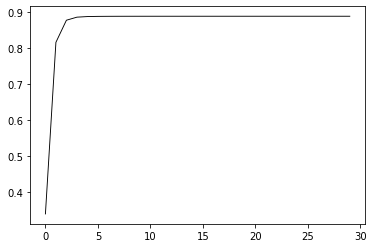

In [2]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

pops = np.load("pops.npy")

level = 150
var = []
for i in pops:
    var.append(i[level])

plt.plot(np.arange( 0 , len(var)) , var , color ='black' , linewidth = .9)
print(var)

In [3]:
#h = 6.9
#alpha = 1
def kernel(x_i, x_j, h):
    X_i, X_j = np.meshgrid(x_i, x_j)
    return alpha**2 * np.exp(-0.5 * (X_i-X_j)**2 / h**2)

def GP_Prior(h,alpha):
    N = 31
    x_min = 0
    x_max = 30.0
    #x_min = -x_max
    
    
    plt.figure(1,dpi = 100)
    x = np.linspace(x_min, x_max, N)
    mean = np.zeros(N)
    cov  = kernel(x, x, h)
    fs = np.random.multivariate_normal(mean, cov, 10).T
    fig1, (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))
    fig1.set_tight_layout(True)
    ax1.matshow(cov)
    ax2.plot(x, fs, c='cyan', linewidth=0.5)
    ax2.plot(x, mean, c='k')
    ax2.set_xlim((x_min, x_max))
    ax2.set_ylim((-5*alpha**2, 5*alpha**2))

    plt.show()
    
    return h

interact(GP_Prior,h=(0.1,10,0.1),alpha=(0.1,1,0.01))

interactive(children=(FloatSlider(value=5.0, description='h', max=10.0, min=0.1), FloatSlider(value=0.55, desc…

<function __main__.GP_Prior(h, alpha)>

<Figure size 600x400 with 0 Axes>

[12]


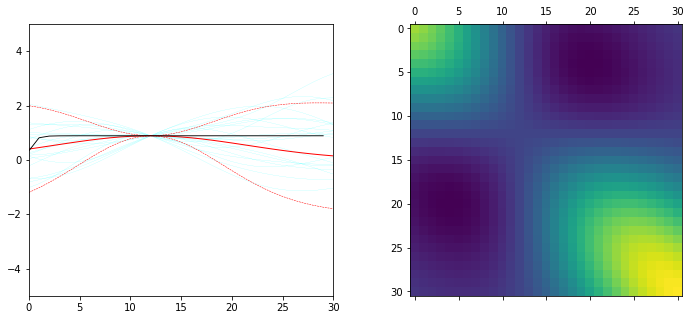

In [3]:
h = 9.5
alpha = 1

def kernel(x_i, x_j, h):
    X_i, X_j = np.meshgrid(x_i, x_j)
    return alpha**2 * np.exp(-0.5 * (X_i-X_j)**2 / h**2)

N = 31
x_min = 0
x_max = 30.0

x = np.linspace(x_min, x_max, N)
y = []
#y = np.arange(0,30,3).tolist()
#y.append(29)
y.append(12)

y = np.array(y)
print(y)
fy = []
for i in y:
    fy.append(var[i])

mean = np.matmul(np.matmul(kernel(y,x,h), np.linalg.inv(kernel(y,y,h))), fy)
cov  = kernel(x,x,h) - np.matmul(np.matmul(kernel(y,x,h), np.linalg.inv(kernel(y,y,h))), kernel(x,y,h))

fs = np.random.multivariate_normal(mean, cov, 20).T
fig1, (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))
ax1.plot(x, fs, c='cyan', linewidth= .1)
ax1.plot(x, mean, c='red', linewidth=1)
ax1.set_xlim((x_min, x_max))
ax1.set_ylim((-5*alpha**2, 5*alpha**2))
ax1.plot(x, mean+2.0*np.diagonal(cov), linestyle='--', c='red', linewidth=0.5)
ax1.plot(x, mean-2.0*np.diagonal(cov), linestyle='--', c='red', linewidth=0.5)
ax1.plot(np.arange( 0 , len(var)) , var , color ='k' , linewidth = .9)

ax2.matshow(cov)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


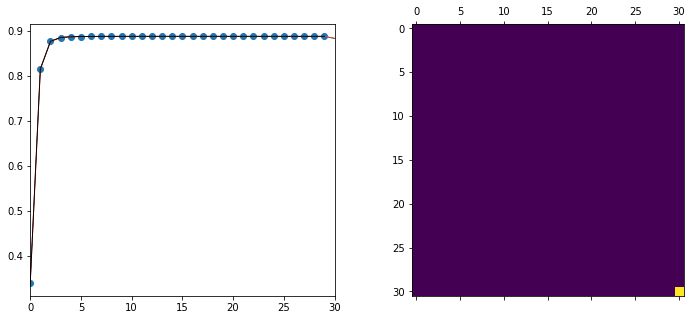

In [4]:
h = 2.21
alpha = .01

def kernel(x_i, x_j, h):
    X_i, X_j = np.meshgrid(x_i, x_j)
    return alpha**2 * np.exp(-0.5 * (X_i-X_j)**2 / h**2)



y = np.arange(0,30,1).tolist()
y = np.array(y)
print(y)
fy = []
for i in y:
    fy.append(var[i])

mean = np.matmul(np.matmul(kernel(y,x,h), np.linalg.inv(kernel(y,y,h))), fy)
cov  = kernel(x,x,h) - np.matmul(np.matmul(kernel(y,x,h), np.linalg.inv(kernel(y,y,h))), kernel(x,y,h))

fs = np.random.multivariate_normal(mean, cov, 20).T

fig1, (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))
ax1.plot(x, fs, c='cyan', linewidth= .1)
ax1.plot(x, mean, c='red', linewidth=1)
ax1.set_xlim((x_min, x_max))
#plt.ylim((-5*alpha**2, 5*alpha**2))
#plt.ylim((0.338,0.34))
ax1.plot(x, mean+2.0*np.diagonal(cov), linestyle='--', c='gray', linewidth=0.5)
ax1.plot(x, mean-2.0*np.diagonal(cov), linestyle='--', c='gray', linewidth=0.5)
ax1.plot(np.arange( 0 , len(var)) , var , color ='k' , linewidth = .9)
ax1.scatter(y,fy)

ax2.matshow(cov)
   


In [5]:
pops[29][level]

0.88757299104466011154

In [6]:
print(mean[30])

0.8831024343562020231


In [7]:
pops[29][level] - mean[30]

0.004470556688458088431

In [9]:
D = np.diag(cov)

In [10]:
print(D)

[-1.85059758e-16 -3.19140330e-15 -2.41831295e-14 -2.24942135e-15
  2.46011843e-14  3.28877144e-14  1.41614856e-13  1.34558868e-13
  1.80513157e-14 -4.75098422e-13 -7.74486893e-13 -1.04257784e-12
 -9.61366146e-13 -8.95002497e-13 -2.44975034e-13  2.46198840e-13
 -9.13460524e-14 -2.84139574e-14 -1.16073777e-13 -5.23671547e-14
 -1.06175851e-13 -1.77939098e-13  2.13686490e-14 -8.13422951e-14
 -3.24795258e-14  1.70662638e-14 -2.30725947e-14  7.70271433e-16
 -3.99092109e-15 -3.23376850e-16  1.82880197e-07]


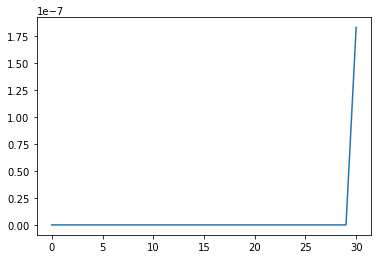

In [11]:
plt.plot(x,D)